# Анализ датасета Alcohol Effects On Study

**Цель анализа** : работа с данными, разведочный анализ данных, выявление различных факторов, влияющих на успеваемость, в частности оценить, как употребление алкоголя влияет на успеваемость

**Дополнительно**: прогнозирование финальной оценки (G3) c помощью KNN regression

ссылка - https://www.kaggle.com/datasets/whenamancodes/alcohol-effects-on-study

# Описание данных - Датасет с оценками по математике

1. **school**:	школа ученика  (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

2. **sex**:	пол  (binary: 'F' - female or 'M' - male)

3. **age**:	возраст (numeric: from 15 to 22)

4. **address**:	тип домашнего адреса (binary: 'U' - urban or 'R' - rural)

5. **famsize**:	размер семьи (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

6. **Pstatus**:	статус совместного проживания родителей  (binary: 'T' - living together or 'A' - apart)

7. **Medu**:	образование матери (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

8. **Fedu**:	образование отца (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

9. **Mjob**:	работа матери (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

10. **Fjob**:	fработа отца (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

11. **reason**:	причина для выбора школы (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

12. **guardian**:	опекун (nominal: 'mother', 'father' or 'other')

13. **traveltime**:	время дороги до школы (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14. **studytime**:	еженедельное учебное врем (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15. **failures**:	количество неудач на занятиях в прошлом  (numeric: n if 1<=n<3, else 4)

16. **schoolsup**:	дополнительная образовательная поддержка  (binary: yes or no)

17. **famsup**:	семейная образовательная поддержка (binary: yes or no)

18. **paid**:	дополнительные платные занятия в рамках предмета (Math) (binary: yes or no)

19. **activities**:	внеклассные мероприятия (binary: yes or no)

20. **nursery**:	посещал детский сад  (binary: yes or no)

21. **higher**:	хочет получить высшее образование (binary: yes or no)

22. **internet**:	доступ в Интернет дома (binary: yes or no)

23. **romantic**:	имеет романтические отношения (binary: yes or no)

24. **famrel**:	качество семейных отношений (numeric: from 1 - very bad to 5 - excellent)

25. **freetime**:	свободное время после школы (numeric: from 1 - very low to 5 - very high)

26. **goout**:	прогулки с друзьями (numeric: from 1 - very low to 5 - very high)

27. **Dalc**:	употребление алкоголя в рабочий день (numeric: from 1 - very low to 5 - very high)

28. **Walc**:	употребление алкоголя в выходные дни (numeric: from 1 - very low to 5 - very high)

29. **health**:	текущее состояние здоровья (numeric: from 1 - very bad to 5 - very good)

30. **absences**:	количество пропусков занятий в школе (numeric: from 0 to 93)

31. **Grades**: оценки за первый период (G1), второй период (G2), итоговая оценка (G3).

# Начнём работу с данными

In [3]:
#импортируем библиотеки

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#from pandas.core.computation.check import NUMEXPR_INSTALLED

In [4]:
#отображение всех столбцов в датасете
pd.set_option('display.max_columns', None)

In [48]:
# загрузим данные и проверим отображение
data = pd.read_csv('Maths.csv', delimiter=',')
data.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         3       yes     no  yes   
3    home   mother           1          3         0        no    yes  yes   
4    home   father           1          2         0        no    yes  yes   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \
0         no     yes    yes       no       no       4         3      4     1   
1         no      no    yes      yes       no       5         3      3     1   
2         no     yes    yes      yes       no       4         3      2     2   
3        yes     yes    yes      yes      yes       3         2      2     1   
4         no     yes    yes       no       no       4         3      2     1   

   Walc  health  absences  G1  G2  G3  
0     1       3         6   5   6   6  
1     1       3         4   5   5   6  
2     3       3        10   7   8  10  
3     1       5         2  15  14  15  
4     2       5         4   6  10  10

In [6]:
# описание датасета 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [7]:
# дескриптивная статистика по переменным формата int64. Можно увидеть среднее значение переменных - неактуально для категориальных переменных
#Также максимальные и минимальные значения
data.describe().T

count       mean       std   min   25%   50%   75%   max
age         395.0  16.696203  1.276043  15.0  16.0  17.0  18.0  22.0
Medu        395.0   2.749367  1.094735   0.0   2.0   3.0   4.0   4.0
Fedu        395.0   2.521519  1.088201   0.0   2.0   2.0   3.0   4.0
traveltime  395.0   1.448101  0.697505   1.0   1.0   1.0   2.0   4.0
studytime   395.0   2.035443  0.839240   1.0   1.0   2.0   2.0   4.0
failures    395.0   0.334177  0.743651   0.0   0.0   0.0   0.0   3.0
famrel      395.0   3.944304  0.896659   1.0   4.0   4.0   5.0   5.0
freetime    395.0   3.235443  0.998862   1.0   3.0   3.0   4.0   5.0
goout       395.0   3.108861  1.113278   1.0   2.0   3.0   4.0   5.0
Dalc        395.0   1.481013  0.890741   1.0   1.0   1.0   2.0   5.0
Walc        395.0   2.291139  1.287897   1.0   1.0   2.0   3.0   5.0
health      395.0   3.554430  1.390303   1.0   3.0   4.0   5.0   5.0
absences    395.0   5.708861  8.003096   0.0   0.0   4.0   8.0  75.0
G1          395.0  10.908861  3.319195   3.0   8.0  11.0  13.0  19.0
G2          395.0  10.713924  3.761505   0.0   9.0  11.0  13.0  19.0
G3          395.0  10.415190  4.581443   0.0   8.0  11.0  14.0  20.0

In [8]:
# проверим, есть ли пропуски в датасете - пропущенных значений нет
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# Разведочный анализ данных

In [46]:
#нумерические переменные
num_cols=data.select_dtypes(include=['float64', 'int64'])
num_cols.head()

age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  Walc  health  absences  G1  G2  G3  
0     1     1       3         6   5   6   6  
1     1     1       3         4   5   5   6  
2     2     3       3        10   7   8  10  
3     1     1       5         2  15  14  15  
4     1     2       5         4   6  10  10

In [47]:
num_cols.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [49]:
#категориальные
cat_cols=data.select_dtypes(include=['object'])
cat_cols.head()

school sex address famsize Pstatus     Mjob      Fjob  reason guardian  \
0     GP   F       U     GT3       A  at_home   teacher  course   mother   
1     GP   F       U     GT3       T  at_home     other  course   father   
2     GP   F       U     LE3       T  at_home     other   other   mother   
3     GP   F       U     GT3       T   health  services    home   mother   
4     GP   F       U     GT3       T    other     other    home   father   

  schoolsup famsup paid activities nursery higher internet romantic  
0       yes     no   no         no     yes    yes       no       no  
1        no    yes   no         no      no    yes      yes       no  
2       yes     no  yes         no     yes    yes      yes       no  
3        no    yes  yes        yes     yes    yes      yes      yes  
4        no    yes  yes         no     yes    yes       no       no

In [50]:
cat_cols.columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [51]:
num_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3']
cat_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']

In [63]:
numeric = num_cols.filter(['age', 'studytime', 'Dalc', 'Walc',  'absences',  'G3'], axis=1)
numeric.head()

age  studytime  Dalc  Walc  absences  G3
0   18          2     1     1         6   6
1   17          2     1     1         4   6
2   15          2     2     3        10  10
3   15          3     1     1         2  15
4   16          2     1     2         4  10

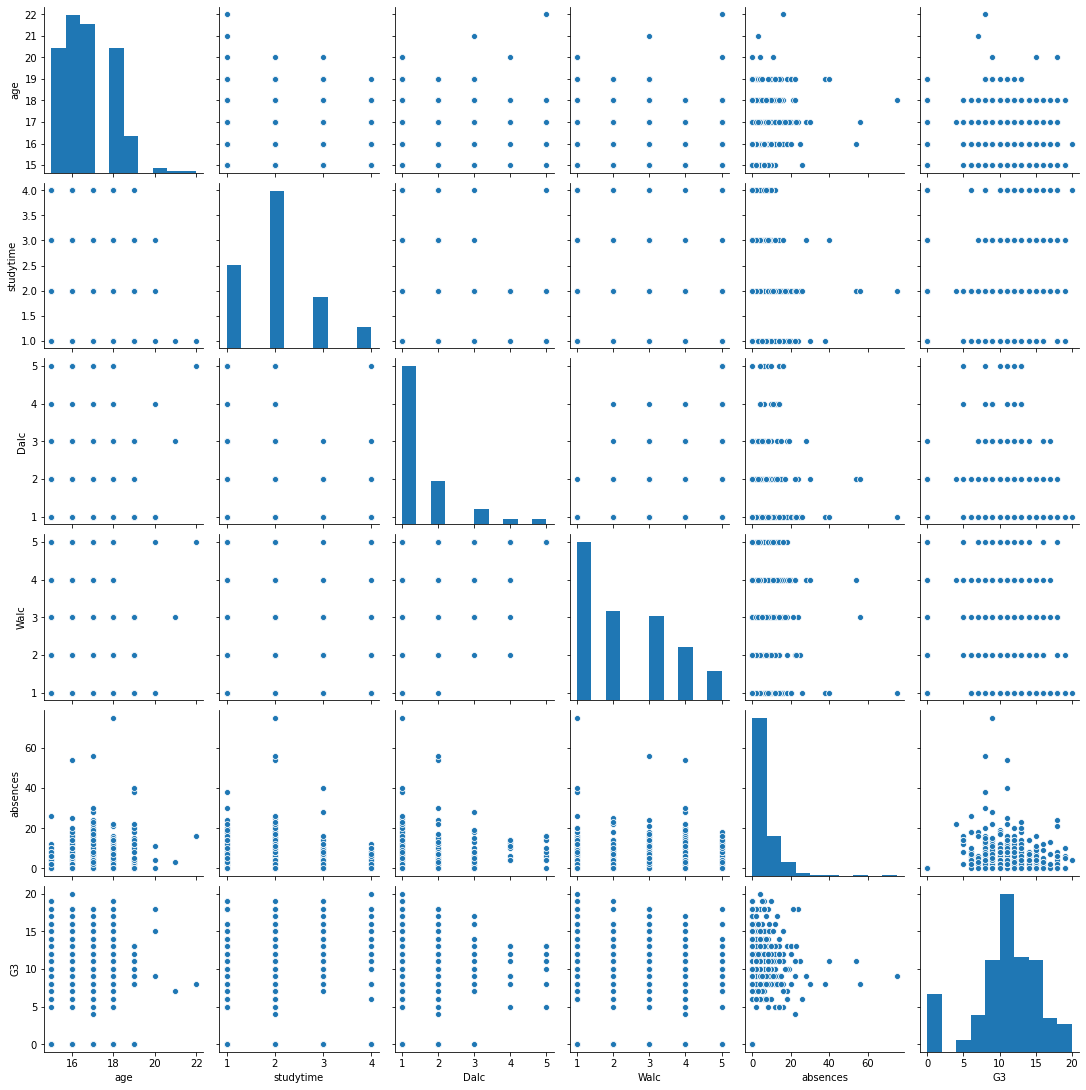

In [66]:
#построим графики распределения и взаимосвязей для основных нумерических переменных
sns.pairplot(numeric)

**Посмотрим на распределения возраста школьников и количества пропусков занятий**

большинство учеников возрастом 15-18 лет

Text(0.5, 1.0, 'Возраст школьников')

<Figure size 1080x504 with 0 Axes>

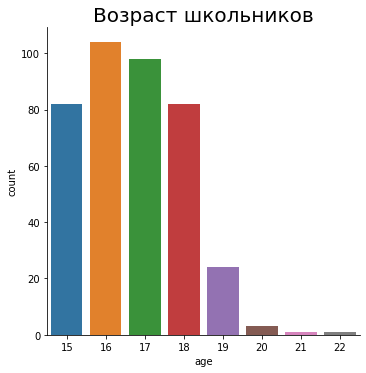

In [24]:
sns.catplot(x = "age", kind = "count", data = data)
plt.title('Возраст школьников', fontsize = 20)

Text(0.5, 1.0, 'Пропуски занятий')

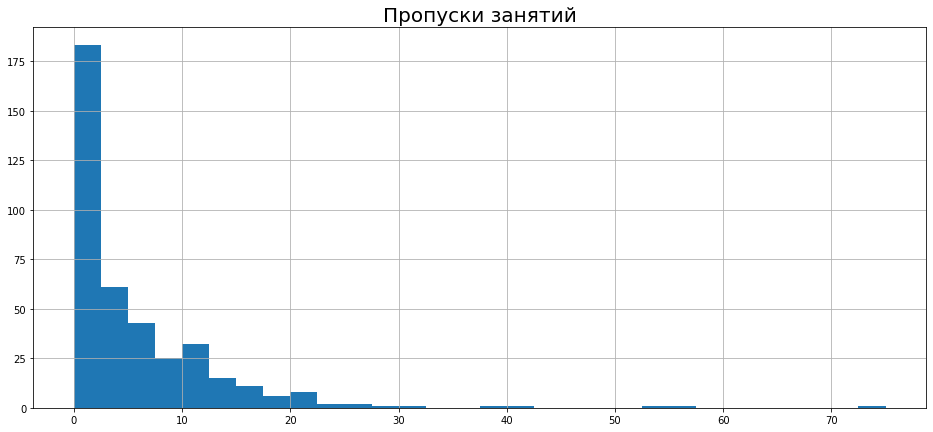

In [82]:
plt.figure(figsize = (16,7))
data["absences"].hist(bins = 30)
plt.title('Пропуски занятий', fontsize = 20)

### Доверительный интервал, Z-score и выбросы

Стандартизированная оценка (z-оценка) — это относительная мера, которая показывает, на сколько среднеквадратичных отклонений наблюдаемое значение отличается от среднего значения распределения. Знак z-оценки показывает, находится ли значение левее среднего (–) или правее среднего (+).

Доверительный интервал представляет собой диапазон оценок для параметра и вычисляется с определенным уровнем достоверности - в моём случе с 99% вероятностью.

In [160]:
data['absences'].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

В среднем ученики пропускают школу 5,7 раз, а 75% учеников не пропускают более 8 раз

In [124]:
from scipy import stats

In [128]:
def my_norm_confidence(df=data, column = "absences", alpha = 0.99):
    interval = stats.norm.interval(alpha, loc = df[column].mean(), scale = df[column].std())
    return interval

In [129]:
confidence = my_norm_confidence()
confidence

(-14.905747630465392, 26.323469149452734)

С 99% вероятностью студент не пропускает школу больше 26 раз

Text(0.5, 1.0, 'Доверительный интервал')

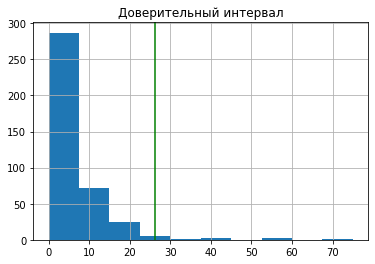

In [158]:
data['absences'].hist()
plt.axvline(x = confidence[1], color = 'g', linestyle = '-')

plt.title('Доверительный интервал')

In [139]:
import scipy.stats
scipy.stats.zscore(data['absences'])

array([ 0.03642446, -0.21379577,  0.53686493, -0.464016  , -0.21379577,
        0.53686493, -0.71423623,  0.03642446, -0.71423623, -0.71423623,
       -0.71423623, -0.21379577, -0.464016  , -0.464016  , -0.71423623,
       -0.21379577,  0.03642446, -0.21379577,  1.28752563, -0.21379577,
       -0.71423623, -0.71423623, -0.464016  , -0.71423623, -0.464016  ,
        1.03730539, -0.464016  , -0.21379577, -0.21379577,  1.28752563,
       -0.71423623, -0.71423623, -0.71423623, -0.71423623, -0.71423623,
       -0.71423623, -0.464016  ,  0.16153458, -0.464016  ,  0.2866447 ,
        2.41351667,  0.2866447 , -0.464016  , -0.71423623,  1.03730539,
        0.2866447 ,  0.78708516, -0.21379577, -0.464016  , -0.464016  ,
       -0.464016  , -0.464016  ,  0.03642446, -0.71423623,  0.03642446,
        0.2866447 , -0.71423623, -0.21379577, -0.464016  , -0.464016  ,
        0.03642446,  0.03642446, -0.21379577, -0.464016  , -0.71423623,
       -0.464016  , -0.21379577, -0.21379577, -0.464016  ,  0.78

In [142]:
data['Z_score'] = scipy.stats.zscore(data['absences'])

In [143]:
data[data['Z_score'] > 3]

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
74      GP   F   16       U     GT3       T     3     3     other  services   
183     GP   F   17       U     LE3       T     3     3     other     other   
276     GP   F   18       R     GT3       A     3     2     other  services   
280     GP   M   17       U     LE3       A     4     1  services     other   
307     GP   M   19       U     GT3       T     4     4   teacher  services   
315     GP   F   19       R     GT3       T     2     3     other     other   

         reason guardian  traveltime  studytime  failures schoolsup famsup  \
74         home   mother           1          2         0       yes    yes   
183  reputation   mother           1          2         0        no    yes   
276        home   mother           2          2         0        no     no   
280        home   mother           2          1         0        no     no   
307  reputation    other           2          1         1        no    yes   
315  reputation    other           1          3         1        no     no   

    paid activities nursery higher internet romantic  famrel  freetime  goout  \
74   yes        yes     yes    yes      yes       no       4         3      3   
183   no        yes     yes    yes      yes      yes       5         3      3   
276   no         no      no     no      yes      yes       4         1      1   
280  yes        yes     yes    yes      yes      yes       4         5      4   
307  yes         no     yes    yes      yes      yes       4         3      4   
315   no         no     yes    yes      yes      yes       4         1      2   

     Dalc  Walc  health  absences  G1  G2  G3   Z_score  
74      2     4       5        54  11  12  11  6.041710  
183     2     3       1        56   9   9   8  6.291930  
276     1     1       5        75  10   9   9  8.669022  
280     2     4       5        30   8   8   8  3.039067  
307     1     1       4        38   8   9   8  4.039948  
315     1     1       3        40  13  11  11  4.290168

Можно наблюдать значения, которые находятся значительно правее среднего, то есть студенты, которые пропускали больше всего занятий, можно считать эти значени выбросами.

Посчитаем интерквартильный размах:

In [163]:
q1 = np.percentile(data['absences'], 25)
q3 = np.percentile(data['absences'], 75)

In [166]:
iqr = q3 - q1
iqr_lower_level = q1 - 1.5 * iqr
iqr_upper_level = q3 + 1.5 * iqr

In [169]:
print(iqr)
print(iqr_lower_level, iqr_upper_level)

8.0
-12.0 20.0


In [170]:
data[data['absences'] > iqr_upper_level]

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
40      GP   F   16       U     LE3       T     2     2     other     other   
74      GP   F   16       U     GT3       T     3     3     other  services   
103     GP   F   15       U     GT3       T     3     2  services     other   
183     GP   F   17       U     LE3       T     3     3     other     other   
198     GP   F   17       U     GT3       T     4     4  services   teacher   
205     GP   F   17       U     GT3       T     3     4   at_home  services   
216     GP   F   17       U     GT3       T     4     3     other     other   
260     GP   F   18       U     GT3       T     4     3  services     other   
276     GP   F   18       R     GT3       A     3     2     other  services   
277     GP   M   18       U     GT3       T     4     4   teacher  services   
280     GP   M   17       U     LE3       A     4     1  services     other   
307     GP   M   19       U     GT3       T     4     4   teacher  services   
313     GP   F   19       U     LE3       T     3     2  services     other   
315     GP   F   19       R     GT3       T     2     3     other     other   
320     GP   F   17       U     GT3       A     4     3  services  services   

         reason guardian  traveltime  studytime  failures schoolsup famsup  \
40         home   mother           2          2         1        no    yes   
74         home   mother           1          2         0       yes    yes   
103        home   mother           2          2         0       yes    yes   
183  reputation   mother           1          2         0        no    yes   
198        home   mother           2          1         1        no    yes   
205        home   mother           1          3         1        no    yes   
216  reputation   mother           1          2         2        no     no   
260        home   father           1          2         0        no    yes   
276        home   mother           2          2         0        no     no   
277        home   mother           2          1         0        no     no   
280        home   mother           2          1         0        no     no   
307  reputation    other           2          1         1        no    yes   
313  reputation    other           2          2         1        no    yes   
315  reputation    other           1          3         1        no     no   
320      course   mother           1          2         0        no    yes   

    paid activities nursery higher internet romantic  famrel  freetime  goout  \
40    no        yes      no    yes      yes      yes       3         3      3   
74   yes        yes     yes    yes      yes       no       4         3      3   
103  yes         no     yes    yes      yes       no       4         3      5   
183   no        yes     yes    yes      yes      yes       5         3      3   
198   no         no     yes    yes      yes       no       4         2      4   
205  yes         no     yes    yes      yes      yes       4         4      3   
216  yes         no     yes    yes      yes      yes       3         4      5   
260  yes         no     yes    yes      yes      yes       3         1      2   
276   no         no      no     no      yes      yes       4         1      1   
277  yes        yes     yes    yes      yes       no       3         2      4   
280  yes        yes     yes    yes      yes      yes       4         5      4   
307  yes         no     yes    yes      yes      yes       4         3      4   
313  yes         no      no    yes      yes      yes       4         2      2   
315   no         no     yes    yes      yes      yes       4         1      2   
320  yes         no     yes    yes      yes      yes       5         2      2   

     Dalc  Walc  health  absences  G1  G2  G3   Z_score  
40      1     2       3        25   7  10  11  2.413517  
74      2     4       5        54  11  12  11  6.041710  
103     1     1    

In [171]:
data[data['absences'] > iqr_upper_level].shape

(15, 34)

15 случаев являются выбросами

Определим выбросы через выброс трёх сигм:

In [172]:
#определение выбросов через выброс трёх сигм
def find_anomaly (df = data, column = 'absences'):
    upper_level = df[column].mean() + 3 * df[column].std()
    lower_level = df[column].mean() - 3 * df[column].std()
    anomaly = df[(df[column] > upper_level) ^ (df[column] < lower_level)]                       #^ = & запись идентична
    return upper_level, lower_level, anomaly

In [173]:
anomaly = find_anomaly (df = data, column ='absences')

In [174]:
anomaly

(29.7181478208182,
 -18.300426301830857,
     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
 74      GP   F   16       U     GT3       T     3     3     other  services   
 183     GP   F   17       U     LE3       T     3     3     other     other   
 276     GP   F   18       R     GT3       A     3     2     other  services   
 280     GP   M   17       U     LE3       A     4     1  services     other   
 307     GP   M   19       U     GT3       T     4     4   teacher  services   
 315     GP   F   19       R     GT3       T     2     3     other     other   
 
          reason guardian  traveltime  studytime  failures schoolsup famsup  \
 74         home   mother           1          2         0       yes    yes   
 183  reputation   mother           1          2         0        no    yes   
 276        home   mother           2          2         0        no     no   
 280        home   mother           2          1         0        no     no   
 3

In [178]:
upper_level = data['absences'].mean() + 3 * data['absences'].std()
lower_level = data['absences'].mean() - 3 * data['absences'].std()
print( upper_level, lower_level)

29.7181478208182 -18.300426301830857


In [181]:
iqr_no_outliers = data[data['absences'] <= iqr_upper_level]
std_no_outliers = data[data['absences'] <= upper_level]

In [185]:
print(data['absences'].mean())
print(iqr_no_outliers['absences'].mean())
print(std_no_outliers['absences'].mean())

5.708860759493671
4.602631578947369
5.043701799485861


Видно, что если убрать выбросы, то среднее значение переменной меняется  - студенты в среднем пропускают меньше (около 5 раз против почти 6 при учёте школьников, пропустивших очень много)

In [195]:
data = data.drop(columns='Z_score') 

# Употребление алкоголя 

В выходные дни студенты употребляют больше алкоголя

Text(0.5, 1.0, 'Употребление алкоголя в выходные дни')

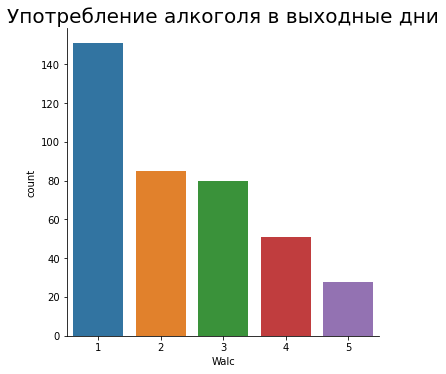

In [89]:
sns.catplot(x = "Walc", kind = "count", data = data)
plt.title('Употребление алкоголя в выходные дни', fontsize = 20)

In [99]:
data["Walc"].describe().to_frame()

Walc
count  395.000000
mean     2.291139
std      1.287897
min      1.000000
25%      1.000000
50%      2.000000
75%      3.000000
max      5.000000

Text(0.5, 1.0, 'Употребление алкоголя в будние дни')

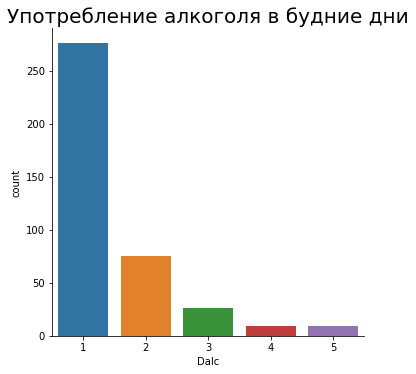

In [93]:
sns.catplot(x = "Dalc", kind = "count", data = data)
plt.title('Употребление алкоголя в будние дни', fontsize = 20)

In [100]:
data["Dalc"].describe().to_frame()

Dalc
count  395.000000
mean     1.481013
std      0.890741
min      1.000000
25%      1.000000
50%      1.000000
75%      2.000000
max      5.000000

# Корреляции

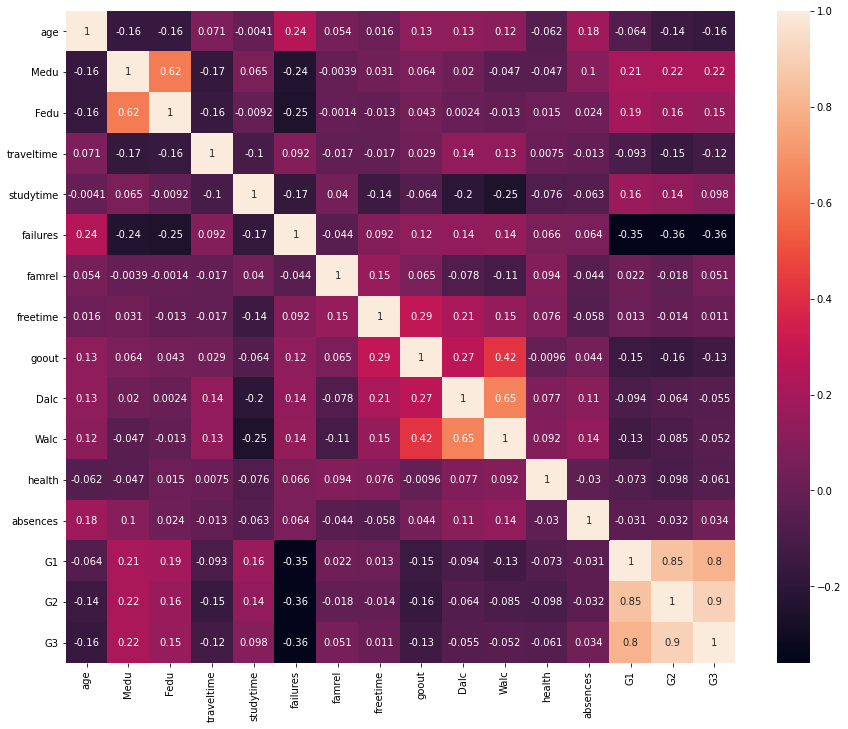

In [120]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(), annot=True)

Можно наблюдать отрицательную корреляцию ( больше 0.1 по модулю) финальной оценки с прошлыми неудачами, также отрицательноя взаимосвязь с возрастом учника, временем, которое ученик тратит на дорогу в школу, временем, которое ученик тратит на прогулки с друзьями.

Положительная корреляция финальной оценки с уровнем образования родителей.

С употреблением алкоголя отрицательная 5% корреляция. У полугодовых оценок также наблюдается отрицательная корреляция с уровнем употребления алкоголя

# Дашборд

Интерактивный дашборд с анализом и графиками по всем переменным датасета

In [85]:
from pandas_profiling import ProfileReport

In [86]:
profile = ProfileReport(data, title='Дашборд')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Успеваемость

Посмотрим на распределение целевой переменной - финальная оценка по математике "G3". Видно, что есть студенты, которые не сдали предмет (получили оценку 0); Средняя оценка составляет 10.4 балла, а больше 50% студентов имеют оценки 11 и выше

Text(0.5, 1.0, 'Оценки по математике')

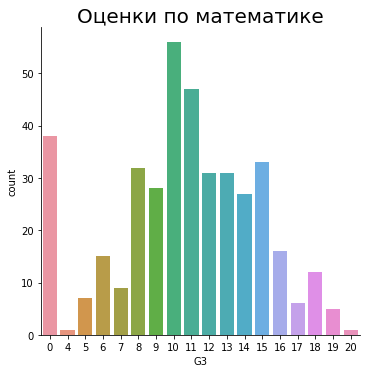

In [80]:
sns.catplot(x = "G3", kind = "count", data = data)
plt.title('Оценки по математике', fontsize = 20)

In [81]:
data["G3"].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [187]:
data.groupby('sex')['G3'].mean().to_frame()  #средний бал у мальчиков выше

G3
sex           
F     9.966346
M    10.914439

In [188]:
data.groupby('school')['G3'].mean().to_frame()   #cредний бал в школе GP выше

G3
school           
GP      10.489971
MS       9.847826

In [191]:
data.groupby('studytime')['G3'].mean().to_frame()   
#средний бал учеников, уделяющих большее время учебе выше, 
#однако самый высокий бал у тех, кто учится 5- 10 часов, а не больше 10 

G3
studytime           
1          10.047619
2          10.171717
3          11.400000
4          11.259259

In [193]:
data.groupby('reason')['G3'].mean().to_frame() #лучше всех учатся школьники, которые выбрали школу из-за её репутации

G3
reason               
course       9.820690
home        10.256881
other       11.166667
reputation  11.142857

Text(0.5, 1.0, 'Зависимость количесвта пропуска занятий от возраста')

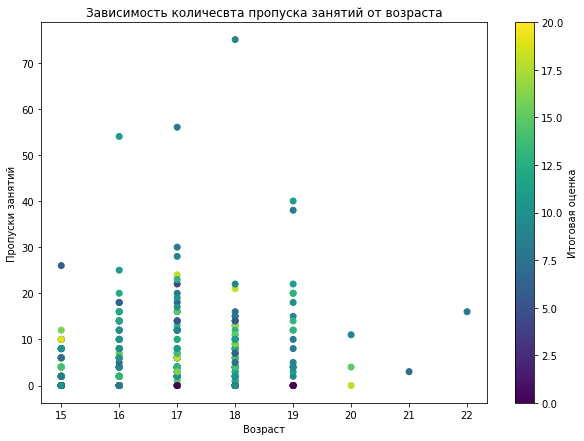

In [45]:
fig, ax = plt.subplots(figsize=(10,7))
grapgh = ax.scatter(data['age'], data['absences'], c = data['G3'])
ax.set_xlabel('Возраст')
ax.set_ylabel('Пропуски занятий')
plt.colorbar(grapgh, label = 'Итоговая оценка')
ax.set_title("Зависимость количесвта пропуска занятий от возраста")

Посмотрим, как отличается распределение оценки в зависимости от принадлежности ученика к разным группам

In [101]:
features = ['school','sex','Pstatus','age','Medu','Fedu','address','Mjob','Fjob','traveltime','studytime',
           'failures','schoolsup','paid','higher','internet','freetime','Walc','Dalc','health']

In [107]:
data_melted = pd.melt(data, id_vars = 'G3', value_vars = features)

In [110]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

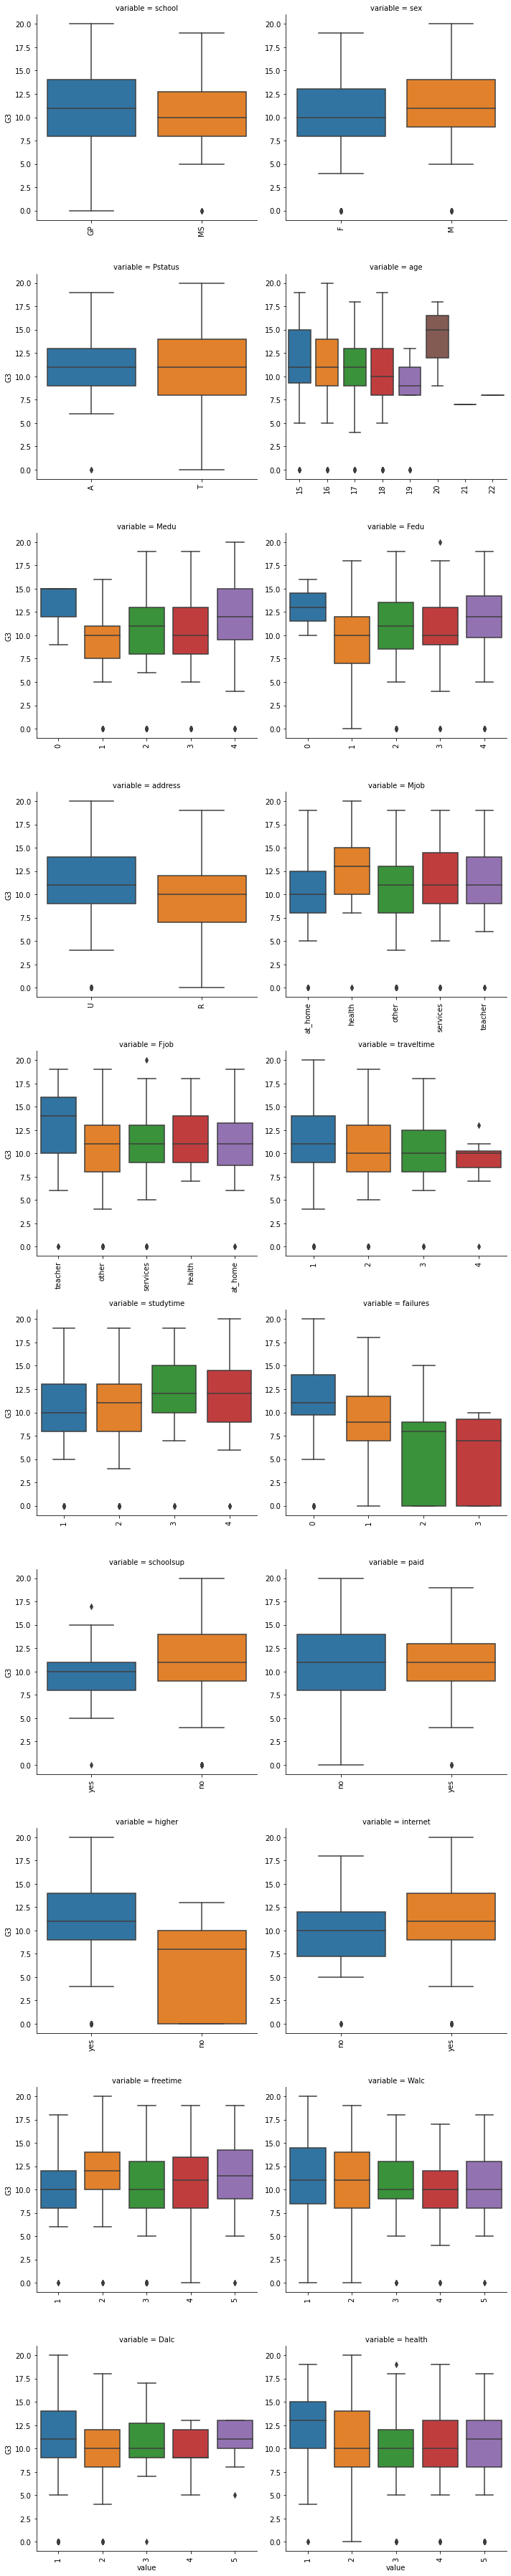

In [111]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
   
g = sns.FacetGrid(data_melted, col = "variable",
                     col_wrap=2, sharex=False, sharey=False, height=5)
    
g.map(boxplot, "value", 'G3')

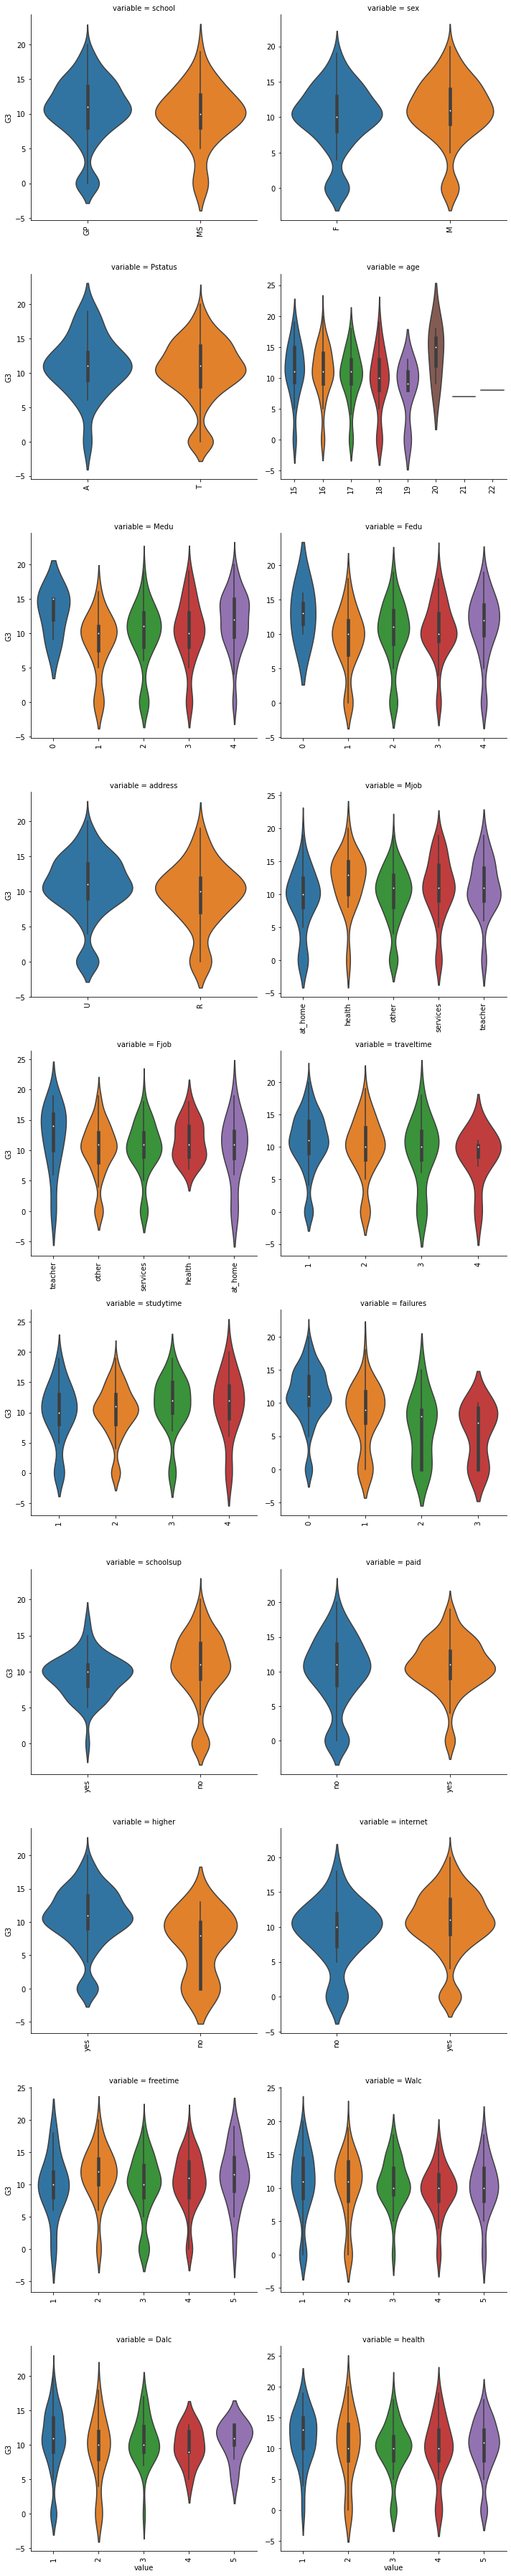

In [119]:
def violinplot(x, y, **kwargs):
    sns.violinplot(x=x, y=y)
    x=plt.xticks(rotation=90)
   
g = sns.FacetGrid(data_melted, col = "variable",
                     col_wrap=2, sharex=False, sharey=False, height=5)
    
g.map(violinplot, "value", 'G3')

### Создадим новую переменную Успеваемость

 которая охарактеризует, как учится студент - он получил оценку выше среднего или ниже среднего

In [196]:
def get_segment(x):
    if x > 10:
        return "Выше среднего"
    elif x <= 10:
        return "Ниже среднего"
    else:
        return x

In [197]:
data['G3'].apply(get_segment)

0      Ниже среднего
1      Ниже среднего
2      Ниже среднего
3      Выше среднего
4      Ниже среднего
           ...      
390    Ниже среднего
391    Выше среднего
392    Ниже среднего
393    Ниже среднего
394    Ниже среднего
Name: G3, Length: 395, dtype: object

In [198]:
data['Успеваемость']=data['G3'].apply(get_segment)

In [199]:
data['Успеваемость'].value_counts().to_frame()

Успеваемость
Выше среднего           209
Ниже среднего           186

In [200]:
data['Успеваемость']  = pd.Categorical(data['Успеваемость'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   school        395 non-null    object  
 1   sex           395 non-null    object  
 2   age           395 non-null    int64   
 3   address       395 non-null    object  
 4   famsize       395 non-null    object  
 5   Pstatus       395 non-null    object  
 6   Medu          395 non-null    int64   
 7   Fedu          395 non-null    int64   
 8   Mjob          395 non-null    object  
 9   Fjob          395 non-null    object  
 10  reason        395 non-null    object  
 11  guardian      395 non-null    object  
 12  traveltime    395 non-null    int64   
 13  studytime     395 non-null    int64   
 14  failures      395 non-null    int64   
 15  schoolsup     395 non-null    object  
 16  famsup        395 non-null    object  
 17  paid          395 non-null    object  
 18  activities

In [203]:
data.groupby('higher')['Успеваемость'].agg(lambda x: x.value_counts().index[0]).to_frame()
#наиболее частое значение по категории - чаще выше среднего учатся ученики, планирующие получать высшее образование

Успеваемость
higher               
no      Ниже среднего
yes     Выше среднего

Посмотрим как в процентном соотношении распределяются студенты по успеваемости по различным характеристикам

In [211]:
#https://www.kaggle.com/code/prathameshgadekar/what-factors-have-an-impact-on-grades#Exploratory-Data-Analysis-:

features = ['school','sex','Pstatus','age','Medu','Fedu','address','Mjob','Fjob','traveltime','studytime',
           'failures','schoolsup','paid','higher','internet','freetime','Walc','Dalc','health']

import plotly.express as px

for feature in features:
    fig = px.histogram(data, x=feature,color="Успеваемость",barnorm = 'percent')
    fig.show()

Можно отметить, что большее количество учеников, которые учатся **выше среднего** среди учеников:

- мужского пола; 

- в школе GP; 

- живущих отдельно от родителей, 

- возрастом 15 и 20 лет, 

- у которых отцы имеют более высокий уровень образования; 

- живущих в городе;- у которых матери работают в индустрии здравоохранения;

- у которых отцы работают учителями; 

- которые тратят меньшее количество времени на дорогу до школы; 

- которые уделяют учебе больше времени; 

- у которых не было неудач в прошлом;

- которые не имеют стипендии; 

- которые планируют получать высшее образование; 

- которые имеют доступ к интернету дома; 

- которые употребляют меньше алкоголя в выходные; 

In [205]:
data.groupby('Dalc')['Успеваемость'].agg(lambda x: x.value_counts().index[0]) 
#наиболее частое значение по категории - по сути мода для каждой категории 
#чаще выше ученики, которые учатся выше среднего встречаются среди тех, кто употребляется очень мало и очень много алкоголя в будние дни

Dalc
1    Выше среднего
2    Ниже среднего
3    Ниже среднего
4    Ниже среднего
5    Выше среднего
Name: Успеваемость, dtype: object

In [206]:
data.groupby('Walc')['Успеваемость'].agg(lambda x: x.value_counts().index[0])
#чаще выше ученики, которые учатся выше среднего встречаются среди тех, кто употребляется мало алкоголя в выходные дни

Walc
1    Выше среднего
2    Выше среднего
3    Ниже среднего
4    Ниже среднего
5    Ниже среднего
Name: Успеваемость, dtype: object

<Figure size 1080x504 with 0 Axes>

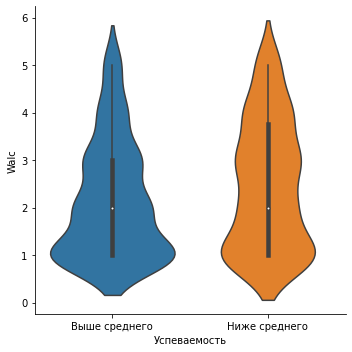

In [207]:
plt.figure(figsize = (15,7))
sns.catplot(x = "Успеваемость", y="Walc", kind = "violin",data = data)

<Figure size 1080x504 with 0 Axes>

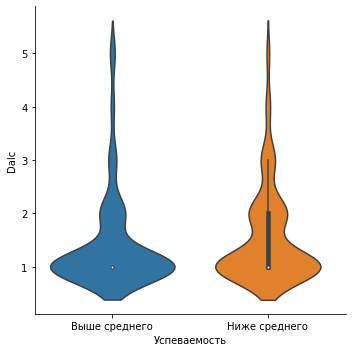

In [208]:
plt.figure(figsize = (15,7))
sns.catplot(x = "Успеваемость", y="Dalc", kind = "violin",data = data)

In [209]:
data.pivot_table(index = "Успеваемость", values = ["Walc", "Dalc"], aggfunc = ['mean', 'median', 'var', 'std' ])
# сделать такую табличку с алко

mean           median            var                 std  \
                   Dalc      Walc   Dalc Walc      Dalc      Walc      Dalc   
Успеваемость                                                                  
Выше среднего  1.421053  2.133971      1    2  0.802632  1.491581  0.895897   
Ниже среднего  1.548387  2.467742      1    2  0.778727  1.796251  0.882455   

                         
                   Walc  
Успеваемость             
Выше среднего  1.221303  
Ниже среднего  1.340243

### Видно, что школьники, которые учатся выше среднего, в среднем употребляют меньше алкололя как по будним, так и по выходным дням

# Extra - KNN regression

Пробую спрогнозировать финальную оценку методом KNN
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

In [212]:
data = data.drop(columns='Успеваемость') 

In [213]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as MSE

In [214]:
# создадим дамми для категориальных переменных

categorical = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
               'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
               'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
               'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
               'Walc', 'health']

# создадим датасет только с категориальными переменными
dt = data.copy()
dt[categorical] = dt[categorical].astype(str)
dt = dt[categorical]

#только с нумерическими
data = data.drop(categorical, axis=1)

#соединим
data = pd.concat([data, dt], axis=1)


data = pd.get_dummies(data, columns = categorical, drop_first = True)
data.head()

age  absences  G1  G2  G3  school_MS  sex_M  address_U  famsize_LE3  \
0   18         6   5   6   6          0      0          1            0   
1   17         4   5   5   6          0      0          1            0   
2   15        10   7   8  10          0      0          1            1   
3   15         2  15  14  15          0      0          1            0   
4   16         4   6  10  10          0      0          1            0   

   Pstatus_T  Medu_1  Medu_2  Medu_3  Medu_4  Fedu_1  Fedu_2  Fedu_3  Fedu_4  \
0          0       0       0       0       1       0       0       0       1   
1          1       1       0       0       0       1       0       0       0   
2          1       1       0       0       0       1       0       0       0   
3          1       0       0       0       1       0       1       0       0   
4          1       0       0       1       0       0       0       1       0   

   Mjob_health  Mjob_other  Mjob_services  Mjob_teacher  Fjob_health  \
0            0           0              0             0            0   
1            0           0              0             0            0   
2            0           0              0             0            0   
3            1           0              0             0            0   
4            0           1              0             0            0   

   Fjob_other  Fjob_services  Fjob_teacher  reason_home  reason_other  \
0           0              0             1            0             0   
1           1              0             0            0             0   
2           1              0             0            0             1   
3           0              1             0            1             0   
4           1              0             0            1             0   

   reason_reputation  guardian_mother  guardian_other  traveltime_2  \
0                  0                1               0             1   
1                  0                0               0             0   
2                  0                1               0             0   
3                  0                1               0             0   
4                  0                0               0             0   

   traveltime_3  traveltime_4  studytime_2  studytime_3  studytime_4  \
0             0             0            1            0            0   
1             0             0            1            0            0   
2             0             0            1            0            0   
3             0             0            0            1            0   
4             0             0            1            0            0   

   failures_1  failures_2  failures_3  schoolsup_yes  famsup_yes  paid_yes  \
0           0           0           0              1           0         0   
1           0           0           0              0           1         0   
2           0           0           1              1           0         1   
3           0           0           0              0           1         1   
4           0           0           0              0           1         1   

   activities_yes  nursery_yes  higher_yes  internet_yes  romantic_yes  \
0               0            1           1             0             0   
1               0            0           1             1             0   
2               0            1           1             1             0   
3               1            1           1             1             1   
4               0            1           1             0             0   

   famrel_2  famrel_3  famrel_4  famrel_5  freetime_2  freetime_3  freetime_4  \
0         0         0         1         0           0           1           0   
1         0         0         0         1           0           1           0   
2         0         0         1         0           0           1           0   
3         0         1         0         0           1           0           0   
4         0         0     

In [219]:
# выделим отдельно предсказываемаю переменную и поделим данные на трейн и тест части
X = data.drop('G3', axis=1)
y = data['G3']

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 0)

#скалируем данные 
sc = MinMaxScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [222]:

pip_knn = Pipeline([
    ('clf', KNeighborsRegressor())
])

params = {'clf__n_neighbors': [x for x in range(1, 100)]} #при скольких соседях среднеквадратичная ошибка минимальна


gs_knn = GridSearchCV(pip_knn,
                      params,
                      cv = None, # 5-fold кросс-валидация
                      scoring='neg_mean_squared_error',
                      n_jobs=-1,
                      return_train_score=True)

gs_knn.fit(X_train_sc, y_train)

GridSearchCV(estimator=Pipeline(steps=[('clf', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'clf__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [223]:
# создаём датафрейм чтобы вытащить из пайпалйна количество соседей
knn_results = pd.DataFrame(gs_knn.cv_results_)
knn_results.head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.003082      0.000636         0.004585        0.000006   
1       0.002825      0.000511         0.006196        0.002417   

  param_clf__n_neighbors                   params  split0_test_score  \
0                      1  {'clf__n_neighbors': 1}         -34.562500   
1                      2  {'clf__n_neighbors': 2}         -31.070312   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0         -20.841270         -34.365079         -28.349206         -27.269841   
1         -15.583333         -21.908730         -22.257937         -23.158730   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0       -29.077579        5.092686               99           -0.000000   
1       -22.795809        4.933460               98           -6.804563   

   split1_train_score  split2_train_score  split3_train_score  \
0            -0.00000            -0.00000           -0.000000   
1            -8.56917            -7.80336           -6.758893   

   split4_train_score  mean_train_score  std_train_score  
0           -0.000000          0.000000         0.000000  
1           -6.524704         -7.292138         0.775009

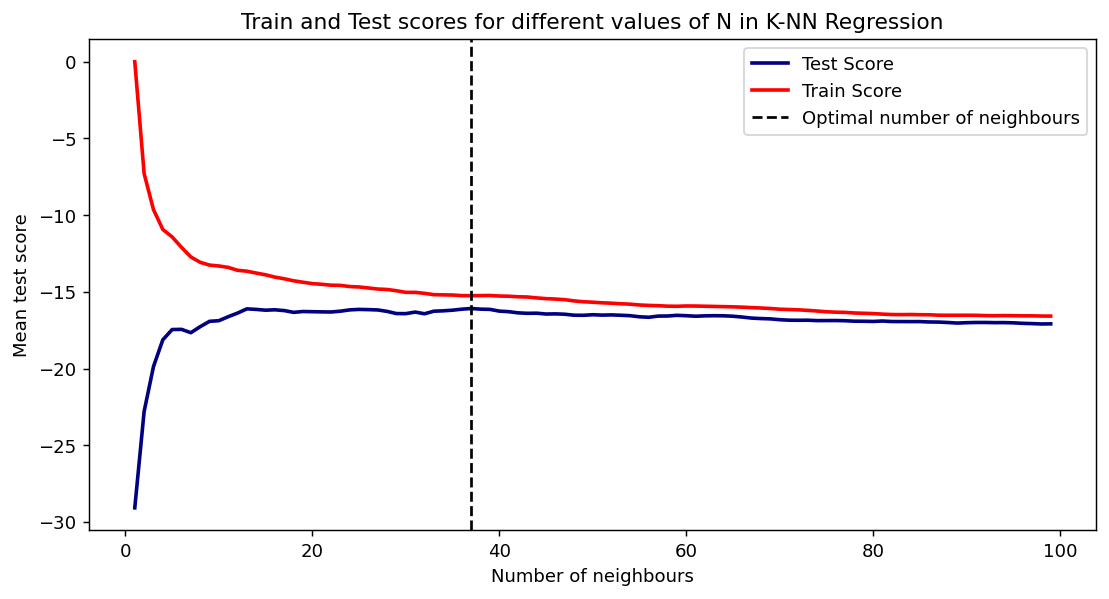

In [224]:
# выводим на график тест и трейн среднеквадратичные ошибки при разном количестве соседей 

plt.figure(figsize = (10, 5), dpi = 130)
plt.title('Train and Test scores for different values of N in K-NN Regression')

sns.lineplot(knn_results['param_clf__n_neighbors'], knn_results['mean_test_score'], 
             color = 'navy', lw = 2, label = 'Test Score')
sns.lineplot(knn_results['param_clf__n_neighbors'], knn_results['mean_train_score'], 
             color = 'red', lw = 2, label = 'Train Score')

plt.axvline(x=gs_knn.best_params_.get('clf__n_neighbors'), color='black', linestyle='--',
           label = 'Optimal number of neighbours')

plt.ylabel('Mean test score')
plt.xlabel('Number of neighbours')

plt.legend()
plt.show()

In [225]:
# метод определяет, какое количество соседей выдаёт лучший скор
print("Best parameters:", gs_knn.best_params_)
print("Best cross-validation score:", gs_knn.best_score_)

Best parameters: {'clf__n_neighbors': 37}
Best cross-validation score: -16.086746495530274


In [226]:
# обучаем модеель с оптимальным количеством соседей

pip_knn.set_params(**gs_knn.best_params_)
pip_knn.fit(X_train_sc, y_train)
#предсказанное значени y_pred
oos_knn = pip_knn.predict(X_test_sc)

In [227]:
print('Out-of-Sample MSE of KNN:', round(MSE(oos_knn, y_test), 3))

Out-of-Sample MSE of KNN: 23.854


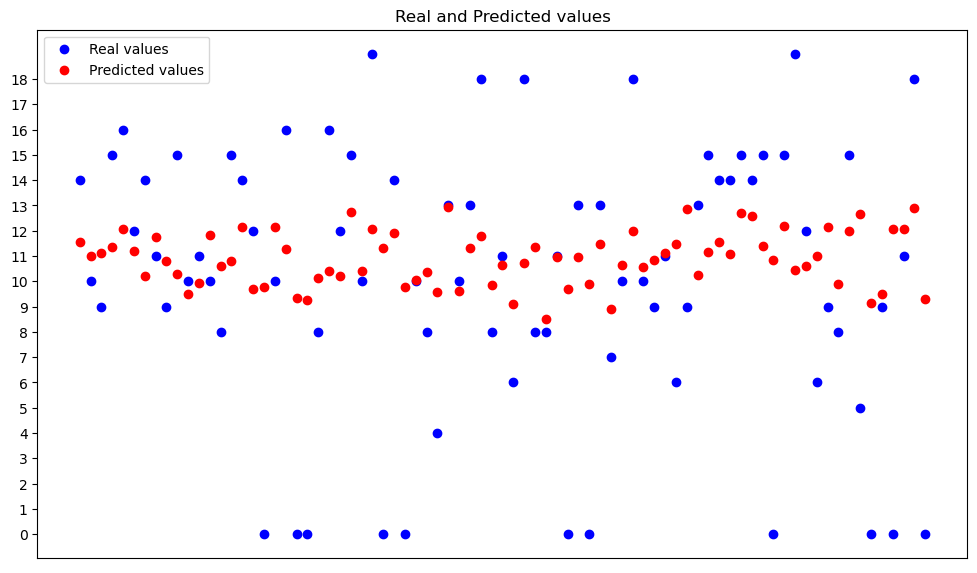

In [228]:
# https://stackoverflow.com/questions/65539013/how-to-plot-a-graph-of-actual-vs-predict-values-in-python


def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    
    plt.figure(figsize=(12, 7), dpi=100)
    
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    
    plt.yticks(np.arange(y_test.min(), y_test.max(), 1))
    plt.xticks([])
    
    plt.title(regressorName)
    plt.legend(['Real values', 'Predicted values'])
    
    plt.show()
    return

plotGraph(y_test, oos_knn, "Real and Predicted values")

На графике виден разброс предсказанных и реальных значений

Видно, что в точности предсказания есть куда стремиться и стоит попробывать другие методы : )